# **Weather Classification with CNN (Project NMDU)**

# Google colab drive mount:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# **1. Data Import**

In [1]:

import os
import numpy as np
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


folder_path = 'Data'

category_names = ['Cloudy', 'Sunny', 'Rainy', 'Snowy', 'Foggy']


def load_data_from_folder(folder_path):
    images = []
    labels = []
    class_counts = {label: 0 for label in range(5)} 

    for label in range(5):
        subfolder_path = os.path.join(folder_path, str(label))
        if not os.path.exists(subfolder_path):
            print(f"Ne postoji {label} ")
            continue

        for filename in os.listdir(subfolder_path):
            filepath = os.path.join(subfolder_path, filename)
            image = cv2.imread(filepath)
            if image is None:
                print(f"greška")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            labels.append(label)
            class_counts[label] += 1  
    return images, labels

images, labels = load_data_from_folder(folder_path)


# 1.1 Show Labels (**Example**)

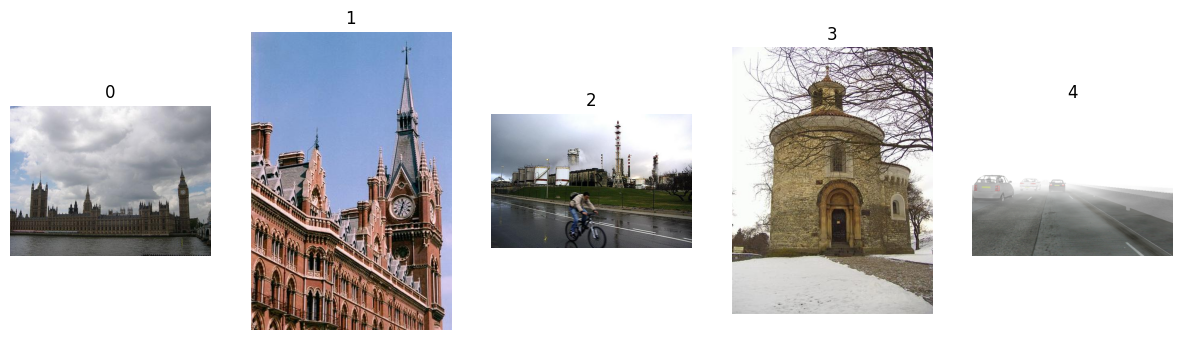

In [2]:
import matplotlib.pyplot as plt
num_categories = len(set(labels))
fig, axs = plt.subplots(1, num_categories, figsize=(15, 5))
for i in range(num_categories):
    category_images = [img for img, lbl in zip(images, labels) if lbl == i]
    axs[i].imshow(category_images[0])
    axs[i].set_title(i)
    axs[i].axis('off')
plt.show()

# **1.2 Resize Images**
In this part we resize the images

In [4]:
def preprocess_data(images, labels, img_size):
    processed_images = []
    processed_labels = []

    for image, label in zip(images, labels):
        image = cv2.resize(image, (img_size, img_size))
        image = image.astype(np.float32) / 255.0
        processed_images.append(image)
        processed_labels.append(label)

    return np.array(processed_images), np.array(processed_labels)



# **1.3 Data split**

Spliting the data

Training: 70%
Validation: 10%
Test: 20%

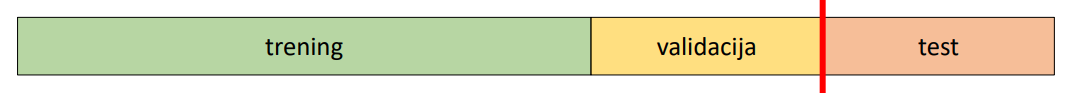






In [5]:
from collections import Counter

images, labels = load_data_from_folder(folder_path)
img_size = 128
processed_images, processed_labels = preprocess_data(images, labels, img_size)

X_train, X_temp, y_train, y_temp = train_test_split(processed_images, processed_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)


print("Trening:", len(X_train))
print("Validacija:", len(X_val))
print("Test:", len(X_test))




Trening: 3238
Validacija: 462
Test: 926


In [ ]:
print( np.min(X_train), np.mean(X_train), np.max(X_train))

# **1.4 Example of preprocessed images**

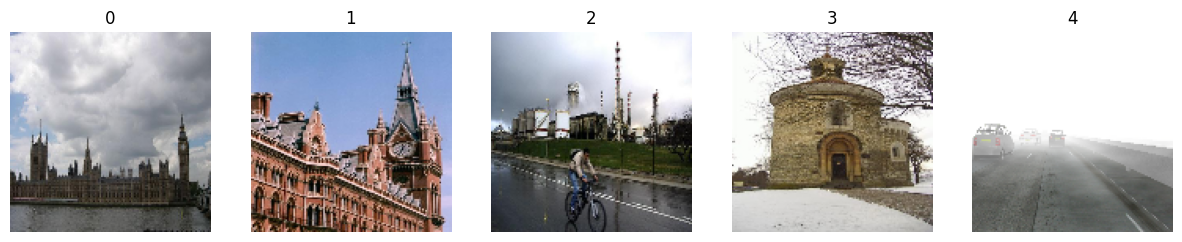

In [6]:
import matplotlib.pyplot as plt

def visualize_data(images, labels):
    num_categories = len(set(labels))
    fig, axs = plt.subplots(1, num_categories, figsize=(15, 5))
    for i in range(num_categories):
        category_images = [img for img, lbl in zip(images, labels) if lbl == i]
        axs[i].imshow(category_images[0])
        axs[i].set_title(i)
        axs[i].axis('off')
    plt.show()

images, labels = load_data_from_folder(folder_path)
processed_images, processed_labels = preprocess_data(images, labels, img_size)
visualize_data(processed_images, processed_labels)


# **2. Creating the Neural network model**

Intialize the model and set the seed for the model

In [20]:
import distutils as _distutils
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, regularizers
from tensorflow.keras.regularizers import l2
import random
import numpy as np

seed = 8
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
random.seed(seed)
np.random.seed(seed)

num_classes = len(np.unique(labels))

model = Sequential()

# **2.1 The first iteration**
epochs = 40

learning_rate = 0.003

optimizer = Adam

Evaluate:

Test loss: 4.163220405578613

Test accuracy: 0.4352051913738251


In [7]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


learning_rate = 0.003
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


C:\Users\ivanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **2.2 The second iteration**

epochs = 40

learning_rate = 0.003

optimizer = Adam

Evaluate:

Test loss: 1.1857184171676636

Test accuracy: 0.5993520617485046

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.01), input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.003
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# **2.3 The third iteration**
epochs = 50

learning_rate = 0.0001

learning_rate (after 20 epochs)  = 0.00005

Barch size = 32

optimizer = Adam

Evaluate:

Test loss: 1.0416771173477173

Test accuracy: 0.6987041234970093

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


inputs = Input(shape=(img_size, img_size, 3))

x = inputs

x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


datagen.fit(X_train)


# **2.3.1 Augmented example**

In [ ]:
augmented_images = next(datagen.flow(X_train, batch_size=5))
plt.figure(figsize=(8, 4))
plt.imshow((augmented_images[0] * 255).astype(np.uint8))
plt.title('Augmented')
plt.axis('off')
plt.show()

# **2.4 The fourth iteration**

**Using Pretrained model VGG19**

epochs = 120
learning_rate = 0.0001

learning_rate (after 20 epochs)  = 0.00005

Barch size = 200

optimizer = RMSProp

Evaluate:

Test loss: 1.1076074838638306

Test accuracy: 0.7138229012489319

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNetV2


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

pre_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

pre_model.trainable = False
for layer in pre_model.layers:
    layer.trainable = False


inputs = Input(shape=(img_size, img_size, 3))
x = pre_model(inputs, training=False)
x = inputs
x = Conv2D(32, (7, 7), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (7, 7), activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

learning_rate = 0.0001
optimizer = RMSprop(learning_rate=learning_rate)


datagen.fit(X_train)



# **2.5 Compile model**

In [22]:
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    23,888,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,998,149 (91.55 MB)

 Trainable params: 23,997,125 (91.54 MB)

 Non-trainable params: 1,024 (4.00 KB)

# **3. Training the model**

In [ ]:
from sklearn.model_selection import train_test_split

logs = 'logs'
epochs = 40

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])


# **3.1 Data augmentation Generator**

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

logs = 'logs'
epochs = 120
batch_size = 200
seed = 8

def smanji_lr(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return 0.00005



tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size,seed=seed),
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(smanji_lr),tensorboard_callback])

Epoch 1/120


C:\Users\ivanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 942ms/step - accuracy: 0.3410 - loss: 11.9067 - val_accuracy: 0.4221 - val_loss: 10.6758 - learning_rate: 1.0000e-04
Epoch 2/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 919ms/step - accuracy: 0.5074 - loss: 10.2530 - val_accuracy: 0.4502 - val_loss: 9.5427 - learning_rate: 1.0000e-04
Epoch 3/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 928ms/step - accuracy: 0.5439 - loss: 9.0133 - val_accuracy: 0.5519 - val_loss: 8.4926 - learning_rate: 1.0000e-04
Epoch 4/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 932ms/step - accuracy: 0.5760 - loss: 7.9599 - val_accuracy: 0.5628 - val_loss: 7.5858 - learning_rate: 1.0000e-04
Epoch 5/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 938ms/step - accuracy: 0.5640 - loss: 7.0858 - val_accuracy: 0.5563 - val_loss: 6.7677 - learning_rate: 1.0000e-04
Epoch 6/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 942ms/step - accuracy: 0.5953 - loss: 6.2384 - val_accuracy: 0.4740 - val_loss: 6.0656 - learning_rate: 1.0000e-04
Epoch 7/120
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 934ms/step - accur

# **3.2 History check**

In [ ]:
history.history

# **3.3 Plot Performance**

# **3.3.1 Loss** 

<function matplotlib.pyplot.show(close=None, block=None)>

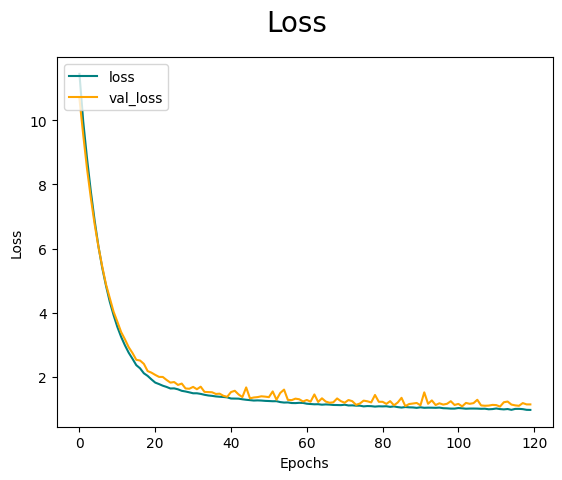

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['loss'],color="teal",label='loss')
plt.plot(history.history['val_loss'],color="orange",label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
fig.suptitle("Loss",fontsize=20)
plt.legend(loc="upper left")
plt.show

# **3.3.2 Accuracy** 

<function matplotlib.pyplot.show(close=None, block=None)>

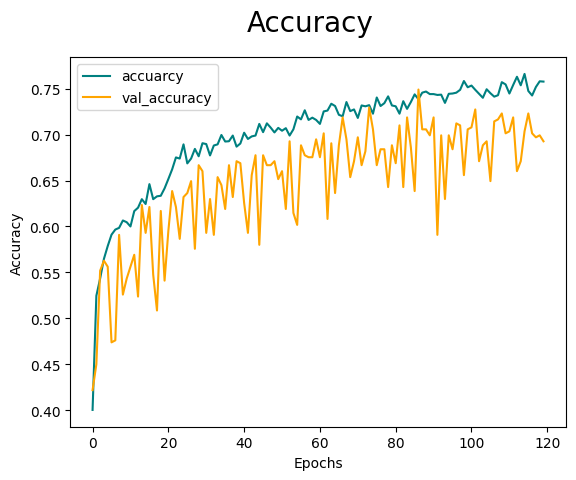

In [25]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color="teal",label='accuarcy')
plt.plot(history.history['val_accuracy'],color="orange",label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show

# **4. Evaluate performance**

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


Test loss: 1.1076074838638306
Test accuracy: 0.7138229012489319


# **5. Confusion matrix**

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Confusion Matrix:
 [[138  34  19  19   6]
 [ 25 169   4   5   0]
 [ 57   5  92  38   5]
 [  6   9  14 165   0]
 [ 11   1   3   4  97]]


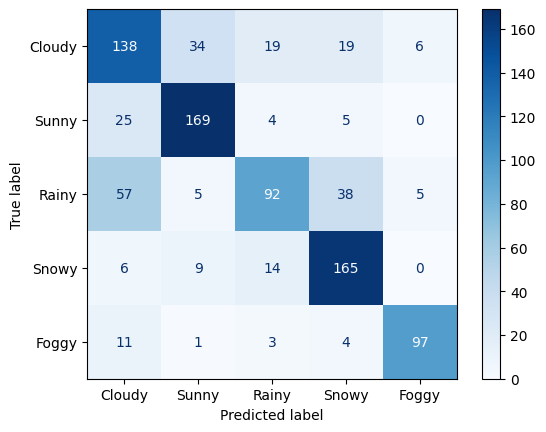

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)

if y_pred.ndim == 2 and y_pred.shape[1] > 1:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = y_pred

if y_test.ndim == 2 and y_test.shape[1] > 1:
    y_true_classes = np.argmax(y_test, axis=1)
else:
    y_true_classes = y_test

cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **6. Save the model**

In [28]:
import os
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'WeatherClassification.h5'))

new_model = load_model(os.path.join('models','WeatherClassification.h5'))
